In [179]:
import os
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
model_folder = os.path.join(Git_Folder, "Python", "Atomspc", "Transformer_models")
model_names = os.listdir(model_folder)
most_recent_model_names = sorted([x for x in model_names if not x.endswith("model.keras")])

N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
dataset_folder = os.path.join(N_drive, "ML_datasets")
datasets = os.listdir(dataset_folder)

In [180]:
import numpy as np
from DataManipulation import reshape_signal
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [181]:
testdatasets = sorted([x for x in datasets if x.startswith("many_test") or x.startswith("test")])
traindatasets = sorted([x for x in datasets if x.startswith("many_train") or x.startswith("train")])
valdatasets = sorted([x for x in datasets if x.startswith("many_val") or x.startswith("val")])

In [182]:
np.sort([x.removeprefix("many_test_") + ".keras" for x in testdatasets]) == np.sort(most_recent_model_names)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False])

In [183]:
import keras
@keras.saving.register_keras_serializable()
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embedding = keras.layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
    
    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1)
        position_embeddings = self.position_embedding(positions)
        return inputs + position_embeddings

In [184]:
name_split = most_recent_model_names[-1]
name_split

'model_LongOUData.keras'

In [185]:
["Testing MSE", "Training MSE", "Validation MSE"]

['Testing MSE', 'Training MSE', 'Validation MSE']

In [ ]:
df = pd.DataFrame()
def MSE(i):
    name_split = most_recent_model_names[i].split("_")
    model = tf.keras.models.load_model(os.path.join(model_folder, most_recent_model_names[0]), custom_objects={'PositionalEncoding': PositionalEncoding})
    testdata = tf.data.Dataset.load(os.path.join(dataset_folder, testdatasets[0]))
    traindata = tf.data.Dataset.load(os.path.join(dataset_folder, traindatasets[0]))
    valdata = tf.data.Dataset.load(os.path.join(dataset_folder, valdatasets[0]))

    testloss = model.evaluate(testdata, verbose=0)
    trainloss = model.evaluate(traindata, verbose=0)
    valloss = model.evaluate(valdata, verbose=0)
    
    # testloss = np.random.uniform(0,1)
    # trainloss =np.random.uniform(0,1)
    # valloss = np.random.uniform(0,1)
    process_name = name_split[0]
    type_model = "Random" if "diffent" in name_split else "Same"
    if most_recent_model_names[i].startswith("model_"):
        type_model = "Random" if "diffent" in name_split else "Same"# if "Data" in name_split else ""
        process_name = "All processes from stochastic" if "Data" in name_split else name_split[1].removesuffix(".keras")
    return process_name, type_model, testloss, trainloss, valloss

names = []
models = []
cols = ["Process", "uni_Testing MSE", "uni_Training MSE", "uni_Validation MSE", "rand_Testing MSE", "rand_Training MSE", "rand_Validation MSE"]
dd = {c: [] for c in cols}

for i in range(60):
    name, model, testMSE, trainMSE, valMSE = MSE(i)

    if name not in dd["Process"]:
        dd["Process"].append(name)
    if model == "Same":
        dd['uni_Testing MSE'].append(testMSE)
        dd['uni_Training MSE'].append(trainMSE)
        dd['uni_Validation MSE'].append(valMSE)
    if model == "Random":
        dd['rand_Testing MSE'].append(testMSE)
        dd['rand_Training MSE'].append(trainMSE)
        dd['rand_Validation MSE'].append(valMSE)

for i in range(60, 62):
    name, model, testMSE, trainMSE, valMSE = MSE(i)
    dd["Process"].append(name)

    if model == "Same":
        dd['uni_Testing MSE'].append(testMSE)
        dd['uni_Training MSE'].append(trainMSE)
        dd['uni_Validation MSE'].append(valMSE)
        dd['rand_Testing MSE'].append("-")
        dd['rand_Training MSE'].append("-")
        dd['rand_Validation MSE'].append("-")

/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'positional_encoding', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'positional_encoding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax ove

In [ ]:
# columns=[('','Process'), ('Constant Parameters','varprocesses'), ('Constant Parameters','meanprocesses'), ('Random Parameters','vardiffent_process_params'), ('Random Parameters','meandiffent_process_params'), ('','Arguments given')]



[('Same parameters', 'Testing MSE'),
 ('Same parameters', 'Training MSE'),
 ('Same parameters', 'Validation MSE'),
 ('Random parameters', '_Testing MSE'),
 ('Random parameters', '_Training MSE'),
 ('Random parameters', '_Validation MSE')]

In [ ]:
df = pd.DataFrame(dd)
# len(dd["rand_Testing MSE"])
# [len(x) for x in list(dd.values())]

df.loc[31, 'Process'] = "LongOU-jump"
columns = [("", "Process")] + [("Same parameters" if x.startswith("uni") else "Random parameters", x.removeprefix("uni_").removeprefix("rand_")) for x in df.columns[1:]]
df.columns=pd.MultiIndex.from_tuples(columns)
# columns
df

Same parameters               \
                                        Process     Testing MSE Training MSE   
0                                Bessel process        0.684550     0.197182   
1                                    Blue noise        0.244035     0.898496   
2                          Brownian (red) noise        0.382467     0.702485   
3                               Brownian bridge        0.341936     0.884557   
4                            Brownian excursion        0.150399     0.926455   
5                      Brownian meander process        0.890756     0.712156   
6                               Brownian motion        0.136557     0.280559   
7                       Colored noise processes        0.931228     0.747873   
8       Constant elasticity of variance process        0.469205     0.668876   
9                    Cox-Ingersoll-Ross process        0.286906     0.750304   
10           Fractional Brownian motion process        0.523572     0.687757   
11            Fractional Gaussian noise process        0.005271     0.260785   
12                                Gamma process        0.450974     0.290789   
13                       Gaussian noise process        0.302518     0.804957   
14                Generalized diffusion process        0.658193     0.012064   
15            Geometric Brownian motion process        0.792626     0.542763   
16                     Inverse Gaussian process        0.749024     0.451233   
17                        Mixed poisson process        0.377719     0.100339   
18                   Ornstein-Uhlenbeck process        0.784625     0.506776   
19                         Pink (flicker) noise        0.096726     0.932243   
20                              Poisson process        0.061180     0.186645   
21                         Red (Brownian) noise        0.883888     0.582929   
22                       Squared Bessel process        0.814585     0.310379   
23                     Symmetric Cauchy process        0.424436     0.660290   
24                       Variance Gamma process        0.000549     0.488635   
25                              Vasicek process        0.973749     0.736122   
26                                 Violet noise        0.164503     0.967776   
27                                  White noise        0.042253     0.354217   
28  Wiener process, or standard Brownian motion        0.600556     0.252357   
29                All processes from stochastic        0.628441     0.715680   
30                                       LongOU        0.711660     0.323033   
31                                  LongOU-jump        0.656415     0.176921   

                  Random parameters                              
   Validation MSE       Testing MSE Training MSE Validation MSE  
0        0.536105           0.08841     0.711655       0.973838  
1        0.560921          0.879507     0.128417       0.313163  
2        0.955055          0.460845     0.334317       0.897061  
3        0.380561          0.841458     0.438021       0.323523  
4        0.311607          0.581373     0.757384       0.664614  
5        0.646258          0.372671     0.408979        0.35106  
6        0.323409          0.089952     0.987831       0.751499  
7        0.503186          0.177137      0.27378       0.192035  
8        0.284116          0.551084     0.194487       0.566673  
9        0.980713          0.782766     0.404426       0.682199  
10       0.118293          0.556609     0.049582       0.402524  
11       0.290629          0.991673      0.91079       0.077339  
12       0.066602          0.919752     0.094299       0.347686  
13       0.582031          0.484966     0.116129       0.324652  
14       0.512981          0.296804     0.106919       0.047337  
15       0.713073          0.246364     0.205545       0.246585  
16       0.610609          0.589433     0.736111       0.201995  
17       0.298664          0.481429     0.628646        0.49764  
18     

In [ ]:
path_to_tex = os.path.join(Git_Folder, "67a9c89827d61417b921f8b8", "Tables", "MSE.tex")

# corr = Data.corr()

styler = df.style
      
(styler.background_gradient(cmap='YlOrRd', axis = 0))

styler.format(precision=3)
styler.to_latex(
    path_to_tex,
    # float_format="%.2f", 
    caption="Processes used for magnetic field profiles, including their mean, variance and arguments passed. The colormap is applied along the columns", 
    label="tab:process", 
    clines="skip-last;data",
    convert_css=True,
    position_float="centering",
    multicol_align="|c|",
    hrules=True,
    position="h!"
)

with open(path_to_tex, "r+") as f:
    # print(f.read())
    # print(f.read().replace("\\begin{tabular}", "\n\n\n"))
    text = f.read().replace("\\begin{tabular}{", "\\resizebox{\\textwidth}{!}{ \n \\begin{tabular}{")
    text = text.replace("\\end{tabular}\n", "\\end{tabular} \n}\n")
    # print(text)
    f.seek(0)
    f.write(text)
    f.close()
    
styler

In [ ]:
!pip install Jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
np.arange(0, 62, 2)
np.arange(1, 62, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61])

In [ ]:
indicies
# col_types


['Bessel process',
 'Bessel process',
 'Blue noise',
 'Blue noise',
 'Brownian (red) noise',
 'Brownian (red) noise',
 'Brownian bridge',
 'Brownian bridge',
 'Brownian excursion',
 'Brownian excursion',
 'Brownian meander process',
 'Brownian meander process',
 'Brownian motion',
 'Brownian motion',
 'Colored noise processes',
 'Colored noise processes',
 'Constant elasticity of variance process',
 'Constant elasticity of variance process',
 'Cox-Ingersoll-Ross process',
 'Cox-Ingersoll-Ross process',
 'Fractional Brownian motion process',
 'Fractional Brownian motion process',
 'Fractional Gaussian noise process',
 'Fractional Gaussian noise process',
 'Gamma process',
 'Gamma process',
 'Gaussian noise process',
 'Gaussian noise process',
 'Generalized diffusion process',
 'Generalized diffusion process',
 'Geometric Brownian motion process',
 'Geometric Brownian motion process',
 'Inverse Gaussian process',
 'Inverse Gaussian process',
 'Mixed poisson process',
 'Mixed poisson proc

/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'positional_encoding', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'positional_encoding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax ove

In [ ]:
print(testloss, trainloss, valloss)

1.090478777885437 1.07198965549469 1.0584346055984497




If you want to build a solid model you have to follow that specific protocol of splitting your data into three sets: One for training, one for validation and one for final evaluation, which is the test set.

The idea is that you train on your training data and tune your model with the results of metrics (accuracy, loss etc) that you get from your validation set.

Your model doesn't "see" your validation set and isn't in any way trained on it, but you as the architect and master of the hyperparameters tune the model according to this data. Therefore it indirectly influences your model because it directly influences your design decisions. You nudge your model to work well with the validation data and that can possibly bring in a tilt.

Exactly that is the reason you only evaluate your model's final score on data that neither your model nor you yourself has used – and that is the third chunk of data, your test set.

Only this procedure makes sure you get an unaffected view of your models quality and ability to generalize what is has learned on totally unseen data.


/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (5000, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
I0000 00:00:1749464072.489496  869868 service.cc:152] XLA service 0x788c6c002380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749464072.489527  869868 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-09 12:14:32.507973: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749464072.548854  869868 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-09 12:14:32.999114: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] p

 41/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9920

I0000 00:00:1749464074.184650  869868 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0383


In [ ]:
import pickle
# pickle.load(o)
# file = open(os.path.join(dataset_folder, pickled_hists[0]),'rb')
# object_file = pickle.load(file)
# file.close()
# with open(os.path.join(dataset_folder, pickled_hists[0]), 'rb') as file:
#     obj = pickle.load(file)
# print(type(obj))
# print(obj.keys() if hasattr(obj, 'keys') else obj)

TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'AdamW', 'config': {'name': 'adamw', 'learning_rate': 9.999999747378752e-05, 'weight_decay': 0.004, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'mse', 'loss_weights': None, 'metrics': None, 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': True}}.

Exception encountered: Could not locate class 'PositionalEncoding'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'Transformer_model', 'class_name': 'PositionalEncoding', 'config': {'name': 'positional_encoding', 'sequence_length': 5000, 'output_dim': 64, 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132002731022464}}, 'registered_name': 'PositionalEncoding', 'build_config': {'input_shape': [None, 5000, 64]}, 'name': 'positional_encoding', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 5000, 64], 'dtype': 'float32', 'keras_history': ['dense', 0, 0]}}], 'kwargs': {}}]}

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step


2025-06-09 12:03:11.962031: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


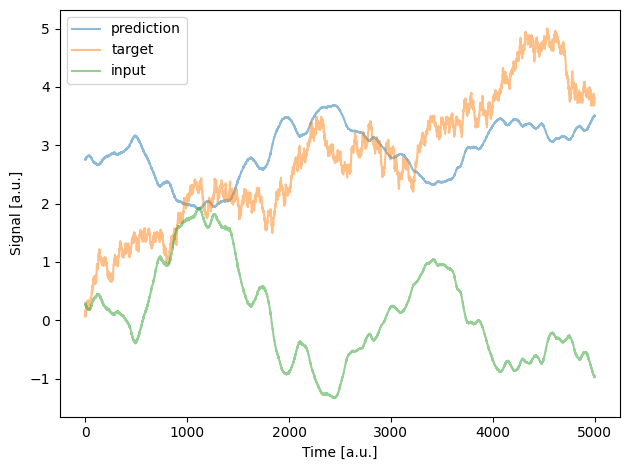

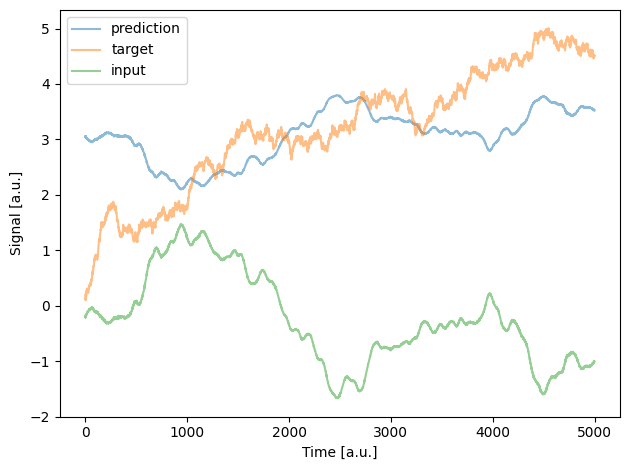

2025-06-09 12:03:14.631121: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


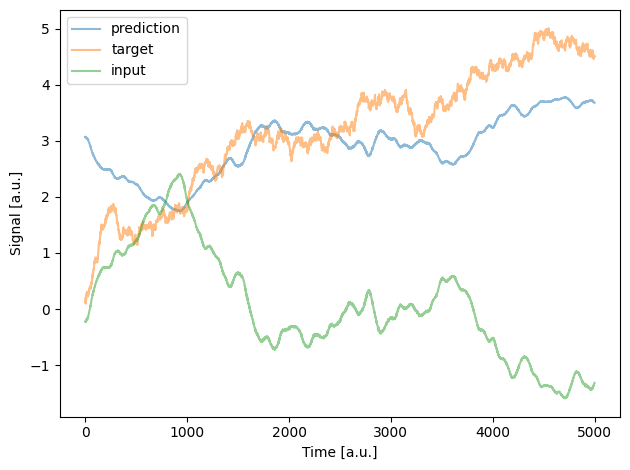

In [ ]:

# Transformer_models/Transformer_longOU.keras
# model = transformer

# model.predict([X_test, np.zeros_like(Y_test)]).shape
test_min = 100
test_max = 104
test_index = np.arange(test_min, test_max)

take = 3

# tests = test_dataset.take(take)
tests = dataset.take(take)
predictions = model.predict(tests)
# print(predictions[0][:, 0])

# t = np.linspace(0, 10, seq_le'ngth)*2*np.pi
# t_x = t[:int(seq_length*0.8)]
# t_y = t[int(seq_length*0.8):]'

# print(predictions.shape)
# for i in range(test_max-test_min):
#     plt.plot(X_test[test_index[i]][:, 0], label = 'input')
#     plt.show()
#     plt.plot(predictions[i][:, 0], label = 'prediction', alpha = 0.5)
#     plt.plot(Y_test[test_index[i]][:, 0], label = 'target', alpha = 0.5)
#     plt.legend()
#     plt.show()

# plt.plot()
# print(list(tests))

reshaped_pred = reshape_signal(predictions[:, 0], take)
# save_dir = "/Users/maimo/OneDrive/Bureau/Christian/Figs/"


for i in range(take):
    # print(i.shape)
    plt.plot(reshaped_pred[i], label = 'prediction', alpha = 0.5) #*1.2-3
    plt.plot(list(tests)[i][1][:, 0], label = 'target', alpha = 0.5)
    plt.plot(list(tests)[i][0][0][:, 0], label = 'input', alpha = 0.5)
    # print(list(tests)[i][0][0][:, 0])
    plt.legend()
    plt.xlabel("Time [a.u.]")
    plt.ylabel("Signal [a.u.]")
    plt.tight_layout()
    # print(list(tests)[i][1][:, 0])
    # if i == 0
    # plt.savefig(os.path.join(Fig_folder, "LongOUProcess" + str(i) + ".svg"))
    plt.show()


In [ ]:
most_recent_model_names[-2:]

['model_Data_diffent_process_params.keras', 'model_Data_processes.keras']

In [ ]:
len(most_recent_model_names)

60

In [ ]:
np.array([x.removeprefix("many_test_") + ".keras" for x in testdatasets]).shape

# np.array(most_recent_model_names).shape

(60,)